In [1]:
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import sklearn as sk

# MFCC

## Leer el audio

(20481,) Simple Rate:  22050
22050


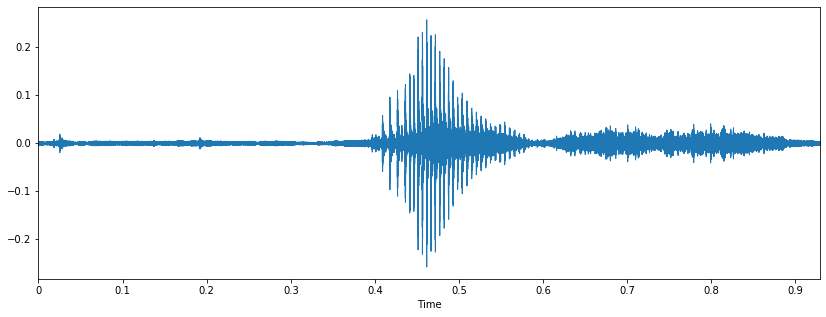

In [18]:
audio_path = '../data/yes/004ae714_nohash_1.wav'
x , sr = librosa.load(audio_path)
print(x.shape, "Simple Rate: ",(sr))
librosa.load(audio_path, sr=sr)

ipd.Audio(audio_path)

#display waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
print(sr)


(20481,)


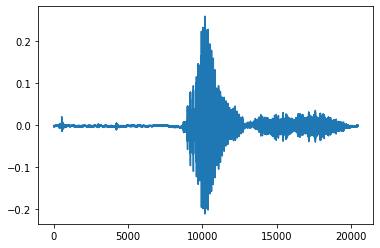

In [19]:
print(x.shape)
plt.plot(x)4

## Normalizamos por amplitud

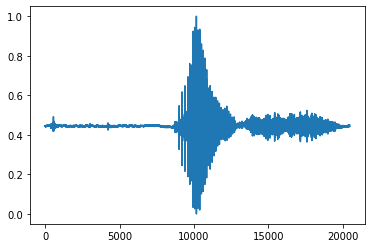

In [11]:
x_normalize=sk.preprocessing.minmax_scale(x, axis=0)
plt.plot(x_normalize)

## Espectograma

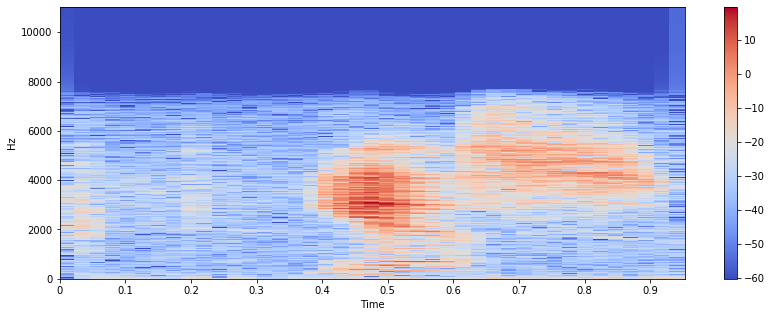

In [12]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()


## MFCCS

- sr= Sampling rate 
- n_mfcc = 20 #  Número de MFCCs
- hop_length = 0.010*sr  # Número de muestras entre ventanas
- n_fft = 0.025*sr # Tamaño de la ventana FFT

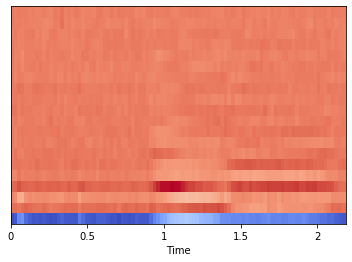

In [13]:
#MFCCS
mfccs = librosa.feature.mfcc(x_normalize, sr=sr,n_mfcc=20,hop_length=int(0.010*sr), n_fft=int(0.025*sr))
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [14]:
print('Shape de MFCC', mfccs.shape)
mfccs

Shape de MFCC (20, 94)


array([[-571.36664  , -557.0026   , -474.89972  , ..., -544.1797   ,
        -550.48694  , -561.1544   ],
       [  35.723446 ,   41.77281  ,   28.182312 , ...,   40.087936 ,
          46.84991  ,   35.772354 ],
       [   6.9280586,   -5.66103  ,  -62.152096 , ...,   -6.089826 ,
          -9.624625 ,   -8.467836 ],
       ...,
       [  11.214926 ,   22.929699 ,   10.963459 , ...,   13.673757 ,
          12.150387 ,    7.8325596],
       [  19.005045 ,   16.443264 ,   15.481596 , ...,    3.1475143,
           9.6065035,    9.146706 ],
       [  20.9452   ,   14.777462 ,   19.153378 , ...,   17.417297 ,
          14.732852 ,   14.093768 ]], dtype=float32)